What are the busiest times of the year to visit Seattle? 

In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
%matplotlib inline

df=pd.read_csv('/Users/tangqi/Desktop/DSND_Term2-master/seattle/reviews.csv')

In [154]:
#monthly_visits={'Jan':0,'Feb':0,'Mar':0,'Apr':0,'May':0,'June':0,'July':0,'Aug':0,'Sept':0,'Oct':0,'Nov':0,'Dec':0}
def Year_Month_Visit(year):
    monthly_visits={'01':0,'02':0,'03':0,'04':0,'05':0,'06':0,'07':0,'08':0,'09':0,'10':0,'11':0,'12':0}
    for c in df['date']:
        if c[:4]==str(year):
            month=c[5:7]
            if month in monthly_visits:
                monthly_visits[month]+=1
    return monthly_visits

In [155]:
for i in range(2009,2017):
    print('Year'+' '+str(i)+':',Year_Month_Visit(i))

Year 2009: {'01': 0, '02': 0, '03': 0, '04': 0, '05': 0, '06': 2, '07': 1, '08': 1, '09': 2, '10': 6, '11': 5, '12': 0}
Year 2010: {'01': 3, '02': 3, '03': 7, '04': 5, '05': 10, '06': 22, '07': 19, '08': 38, '09': 53, '10': 33, '11': 38, '12': 23}
Year 2011: {'01': 23, '02': 32, '03': 33, '04': 50, '05': 56, '06': 106, '07': 151, '08': 215, '09': 148, '10': 124, '11': 134, '12': 97}
Year 2012: {'01': 111, '02': 111, '03': 149, '04': 175, '05': 254, '06': 341, '07': 392, '08': 463, '09': 439, '10': 330, '11': 265, '12': 221}
Year 2013: {'01': 237, '02': 215, '03': 304, '04': 358, '05': 525, '06': 752, '07': 883, '08': 1070, '09': 947, '10': 767, '11': 475, '12': 544}
Year 2014: {'01': 553, '02': 620, '03': 983, '04': 945, '05': 1239, '06': 1772, '07': 2477, '08': 3268, '09': 3103, '10': 2159, '11': 1750, '12': 1496}
Year 2015: {'01': 1717, '02': 1662, '03': 2682, '04': 2700, '05': 3770, '06': 5549, '07': 6580, '08': 7963, '09': 6985, '10': 5536, '11': 3998, '12': 3351}
Year 2016: {'01':

As we can see from the data above, some of the years have very small dataset that is not qualified for analysis.Year 2014 and 2015 have a bunch of data, seems to be a good choice to analyze them.

In [156]:
year2014=sum(Year_Month_Visit(2014).values())
year2015=sum(Year_Month_Visit(2015).values())
d={'2014':[year2014],'2015':[year2015]}
pd.DataFrame(data=d,index=['total visit'])

,2014,2015
total visit,20365,52493


In [157]:
a=Year_Month_Visit(2015)
Y15_Monthly_Rev=DataFrame(list(a.items()),columns = ['Months','Rev Nums']) 
Y15_Monthly_Rev=Y15_Monthly_Rev.replace({'Months':{'01':'Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'June','07':'July','08':'Aug','09':'Sept','10':'Oct','11':'Nov','12':'Dec'}})
Y15_Monthly_Rev['%']=(Y15_Monthly_Rev['Rev Nums']/Y15_Monthly_Rev['Rev Nums'].sum())*100
Y15_Monthly_Rev=Y15_Monthly_Rev.set_index('Months')
Y15_Monthly_Rev

,Rev Nums,%
Months,,
Jan,1717,3.270912
Feb,1662,3.166136
Mar,2682,5.109253
Apr,2700,5.143543
May,3770,7.181910
June,5549,10.570933
July,6580,12.535005
Aug,7963,15.169642
Sept,6985,13.306536


In [137]:
b=Year_Month_Visit(2014)
Y14_Monthly_Rev=DataFrame(list(b.items()),columns = ['Months','Rev Nums']) 
Y14_Monthly_Rev=Y14_Monthly_Rev.replace({'Months':{'01':'Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'June','07':'July','08':'Aug','09':'Sept','10':'Oct','11':'Nov','12':'Dec'}})
Y14_Monthly_Rev['%']=(Y14_Monthly_Rev['Rev Nums']/Y14_Monthly_Rev['Rev Nums'].sum())*100
Y14_Monthly_Rev=Y14_Monthly_Rev.set_index('Months')
Y14_Monthly_Rev

,Rev Nums,%
Months,,
Jan,553,2.715443
Feb,620,3.044439
Mar,983,4.826909
Apr,945,4.640314
May,1239,6.083968
June,1772,8.701203
July,2477,12.163025
Aug,3268,16.047140
Sept,3103,15.236926


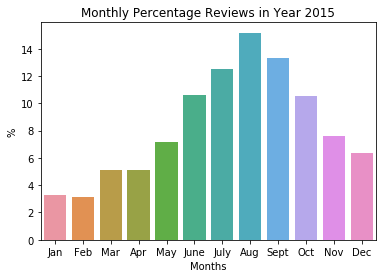

In [285]:
#Plot of Year 2015
ax=sns.barplot(x=Y15_Monthly_Rev.index, y=Y15_Monthly_Rev['%'])
ax.set_title('Monthly Percentage Reviews in Year 2015')
plt.show()

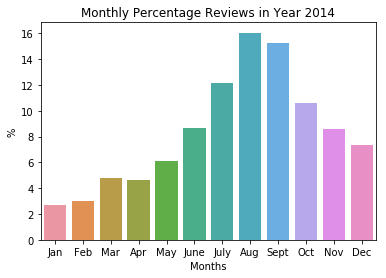

In [284]:
#Plot of Year 2014
ax=sns.barplot(x=Y14_Monthly_Rev.index, y=Y14_Monthly_Rev['%'])
ax.set_title('Monthly Percentage Reviews in Year 2014')
plt.show()